# Segundo Parcial Sis420
Apellido y Nombre: Jorge Cedillo Luis Fabian

CU: 35-5276

Carrera: Ing. de Sistemas

# Implementacion del modelo Aprendizaje No Supervizado

Link del dataset: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

# Librerias

os: Permite interactuar con el sistema operativo (como acceder a archivos y directorios).


numpy (np): Librería para cálculos numéricos eficientes y manejo de arrays.

pandas (pd): Manejo y análisis de datos en forma de tablas (DataFrames).

matplotlib.pyplot (plt): Para crear gráficos y visualizaciones.

sklearn.cluster.KMeans: Algoritmo de clustering no supervisado para agrupar datos en k grupos.

sklearn.decomposition.PCA: Reduce la dimensionalidad de los datos, manteniendo la mayor varianza posible.

sklearn.metrics.silhouette_score: Evalúa qué tan bien definidos están los clusters (valor entre -1 y 1).

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/SIS420/Parciales/Parcial_2/TMNIST_Data.csv')  # Reemplaza con el nombre real del archivo

print("Forma del dataset:", data.shape)
data.head()

Forma del dataset: (29900, 786)


,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


no necesitas las etiquetas (labels) ni nombres (names), porque el modelo aprenderá sin saber las clases reales.

In [5]:
# Opción 1 Eliminar columnas específicas por nombre
data_unsupervised = data.drop(columns=['names', 'labels'])  # Ajusta los nombres exactos

print("Columnas después de eliminar:", data_unsupervised.columns.tolist())

Columnas después de eliminar: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154',

Estás convirtiendo el DataFrame data_unsupervised (que tiene cada imagen como una fila con valores de píxeles) en una lista de listas.

In [7]:
# 3. Convertir cada fila en una lista y agrupar todo en una lista grande
X_matriz_imagenes = data_unsupervised.values.tolist()  # Esto genera [[fila1], [fila2],..]

# Verificación:
print("Tipo de estructura:", type(X_matriz_imagenes))  # Debe ser <class 'list'>
print("Número de imágenes:", len(X_matriz_imagenes))
print("Ej de primera imagen:", X_matriz_imagenes[0][:10])  # Muestra los primeros 10 píxeles

Tipo de estructura: <class 'list'>
Número de imágenes: 29900
Ej de primera imagen: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Estás visualizando las primeras 10 imágenes del dataset, que hasta ahora estaban representadas solo como listas de 784 píxeles.
Las estás reconstruyendo en forma de imagen 28x28 y mostrándolas en una cuadrícula de 2 filas por 5 columnas.


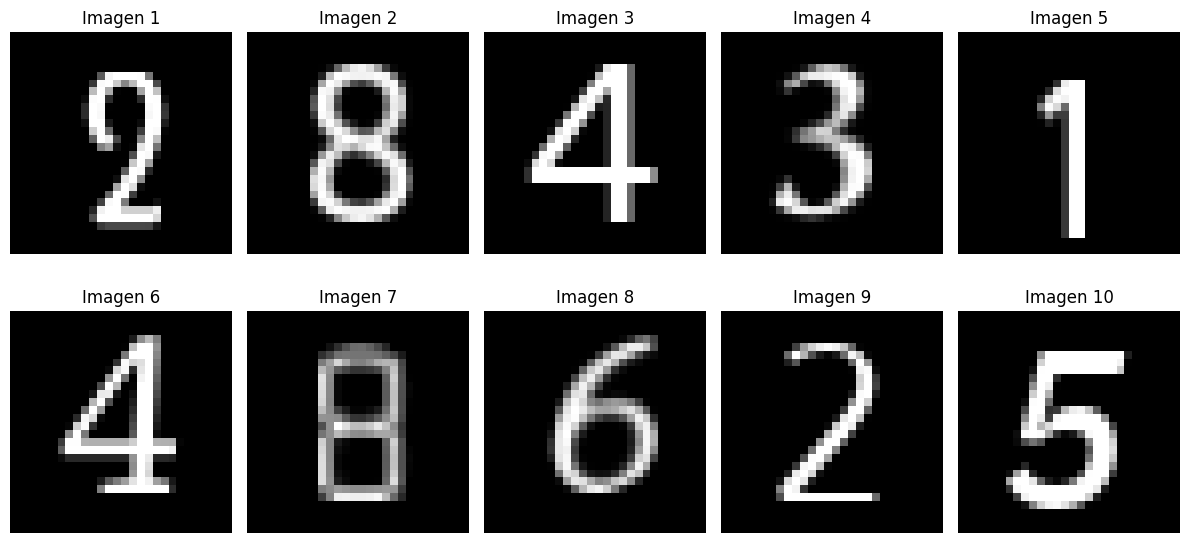

In [9]:
# Asume que 'matriz_imagenes' es tu lista de imágenes (cada una es una lista de 784 píxeles)
num_imagenes = 10  # Número de imágenes a mostrar

# Configurar la cuadrícula 2x5
plt.figure(figsize=(12, 6))  # Tamaño del gráfico (ancho, alto)

for i in range(num_imagenes):
    plt.subplot(2, 5, i + 1)  # 2 filas, 5 columnas, posición i+1

    # Convertir el vector de 784 píxeles a matriz 28x28
    imagen_2d = np.array(X_matriz_imagenes[i]).reshape(28, 28)

    # Mostrar la imagen en escala de grises
    plt.imshow(imagen_2d, cmap='gray')
    plt.title(f"Imagen {i + 1}")  # Título con número de imagen
    plt.axis('off')  # Ocultar ejes

plt.tight_layout()  # Ajustar espaciado entre imágenes
plt.show()

Estás convirtiendo tu lista de listas (X_matriz_imagenes) a un array de NumPy, es necesario porque muchos algoritmo (como K-Means)

In [14]:
# Convertir a array de NumPy (necesario para K-Means)
X = np.array(X_matriz_imagenes)  # Shape: (n_imagenes, 784)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Utilizas n_clusters = 50, lo cual es un valor arbitrario, elegido bajo la suposición de que no conoces de antemano cuántas clases hay.
Aunque hay 10 números, cada uno podría estar escrito en 5 estilos distintos → 10 × 5 = 50 posibles variaciones → uso 50 clusters

In [16]:
n_clusters = 50  # Número arbitrario (simulando que no conocemos las 10 clases reales)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)    #datos de imagen sin etiquetas

# Obtener las etiquetas de cluster asignadas a cada imagen
labels = kmeans.labels_  #Devuelve etiqueta de grupo (0 a 49) para cada imagen

Se esta identificando una imagen representativa para cada uno de los 50 clusters generados k-Means.
En lugar de mostrar el centroide como vector abstracto, estás eligiendo la imagen real más cercana a ese centroide, lo cual tiene más sentido visualmente (porque es una imagen real del dataset)

In [17]:
# Obtener los centroides (shape: (50, 784))
centroides = kmeans.cluster_centers_

# Para cada centroide, encontrar la imagen en X más cercana a él
from sklearn.metrics import pairwise_distances_argmin_min

indices_representativos, _ = pairwise_distances_argmin_min(centroides, X)
imagenes_representativas = X[indices_representativos]  # Shape: (50, 784)
print(imagenes_representativas)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Se visualiza los 50 centroides del modelo K-Means como si fueran imágenes.
Cada centroide es un vector de 784 valores (promedio de todas las imágenes del cluster), y al convertirlo a una matriz 28x28, puedes ver cómo “lucen” los patrones medios de cada grupo.

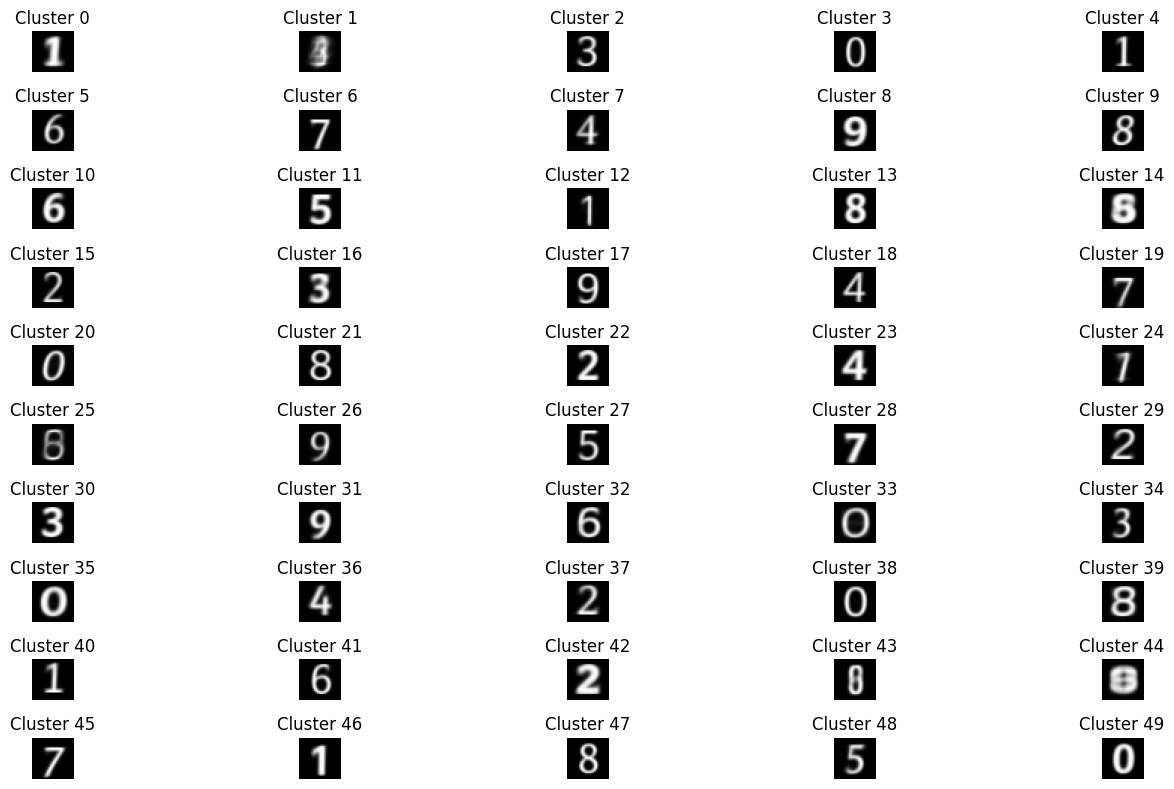

In [19]:
plt.figure(figsize=(15, 8))
for i in range(50):  # Mostrar solo 10 de los 50 clusters
    plt.subplot(10, 5, i + 1) # Hay 50 clusters, por eso el rango es de 0 a 49
    imagen = centroides[i].reshape(28, 28)  # Redimensionar a 28x28
    plt.imshow(imagen, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

Creo una lista manual de etiquetas reales que corresponden a las imágenes representativas que seleccione para los 50 clusters.

In [21]:
y_representative_digits = [1,8,3,0,1,  # Clusters 0–4
                           6,7,4,9,8,
                           6,5,1,8,8,
                           2,3,9,4,7,
                           0,8,2,4,7,
                           8,9,5,7,2,
                           3,9,6,0,3,
                           0,4,2,0,8,
                           1,6,2,8,8, # Clusters 40–44
                           7,1,8,5,0] # Clusters 45–49

propagando las etiquetas manuales que asignaste a cada cluster (y_representative_digits) para que cada imagen del dataset tenga una etiqueta estimada.

Como K-Means agrupó las imágenes en 50 clusters y tú le dijiste manualmente qué dígito representa cada uno, ahora estás diciendo:

Si una imagen está en el cluster 7, su etiqueta será el dígito que yo asigné al cluster 7.

In [24]:
# Crear un array vacío para guardar las etiquetas propagadas
y_train_propagated = np.empty(len(X_matriz_imagenes))  # Inicializa un array del mismo tamaño que el número de imágenes
#print(y_train_propagated.shape)
for i in range(n_clusters):
   # Asigna a todas las imágenes que pertenecen al cluster i
   # la etiqueta correspondiente al dígito representativo del cluster i
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

para poder evaluar el desempeño de un modelo de clasificación sin hacer trampa (es decir, sin entrenar y evaluar con los mismos datos).

In [25]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento (80%) y prueba (20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_matriz_imagenes,
    y_train_propagated, # Las etiquetas propagadas
    test_size=0.2,      # 20% para prueba
    random_state=42,
    stratify=y_train_propagated
)

print("Tamaño del conjunto de entrenamiento:", len(X_train_split))
print("Tamaño del conjunto de prueba:", len(X_test_split))

Tamaño del conjunto de entrenamiento: 23920
Tamaño del conjunto de prueba: 5980


entrenando un modelo de regresión logística como clasificador supervisado usando las imágenes del dataset y las etiquetas que propagaste desde los clusters (etiquetas "estimadas").

Luego evalúas la precisión del modelo en un conjunto de prueba que nunca vio antes. Esto te permite medir qué tan bien aprende el clasificador a partir de esas etiquetas propagadas.

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Entrenamos con los datos propagados (80% del total)
%time log_reg3.fit(X_train_split, y_train_split)

# Evaluamos con el 20% restante
score = log_reg3.score(X_test_split, y_test_split)
print("Precisión con etiquetas propagadas:", score)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 51min 39s, sys: 4min 18s, total: 55min 58s
Wall time: 34min 6s
Precisión con etiquetas propagadas: 0.9165551839464883


calculando el puntaje de silueta (silhouette score), una métrica que mide qué tan bien se agrupan los datos en tus clusters. Es útil para evaluar la calidad del clustering que hiciste con K-Means

In [30]:
from sklearn.metrics import silhouette_score
# - X_matriz_imagenes: los datos (lista de listas de píxeles)
# - kmeans.labels_: las etiquetas asignadas por K-Means a cada imagen
silhouette_score(X_matriz_imagenes, kmeans.labels_)

np.float64(0.10642954654590786)

para evaluar cuál sería el número óptimo de clusters (k) para aplicar K-Means

En lugar de asumir arbitrariamente que k = 50 como antes, estás evaluando diferentes valores de k (desde 2 hasta 9) y calculando el silhouette score para cada uno. Así puedes identificar qué valor de k produce los clusters más coherentes y separados.

Valores calculados: [np.float64(0.1426635806250189), np.float64(0.11519786675445953), np.float64(0.10639424150793755), np.float64(0.10808554439507063), np.float64(0.10947051005851499), np.float64(0.11584471012210452), np.float64(0.12311861170230336), np.float64(0.13244061748661876)]


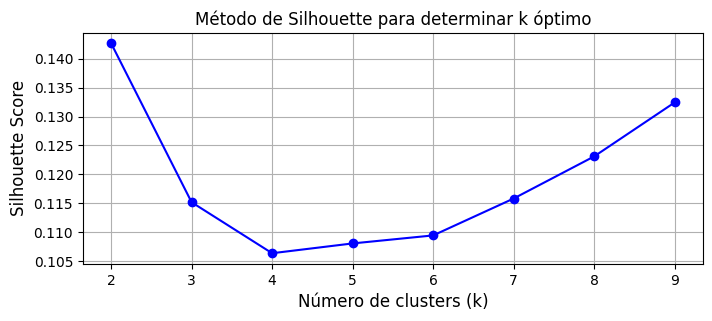

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generar modelos K-Means para k=2 a 9 (rango(1,10) comienza en 1)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_matriz_imagenes)
                for k in range(2, 10)]  # Cambiado a range(2,10)

# Calcular scores (omitimos k=1 porque silhouette no funciona con un cluster)
silhouette_scores = [silhouette_score(X_matriz_imagenes, model.labels_)
                     for model in kmeans_per_k]

print("Valores calculados:", silhouette_scores)  # Para debug

# Graficar
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Método de Silhouette para determinar k óptimo")
plt.grid(True)
plt.show()

el mejor score se da con k = 2, pero eso podría no ser práctico si sabes que tu dataset representa 10 dígitos. Aun así, esto te permite comparar qué tan “bueno” fue haber elegido 50 clusters anteriormente.

Para visualizar cómo se agrupan los datos en distintos valores de k (clusters).

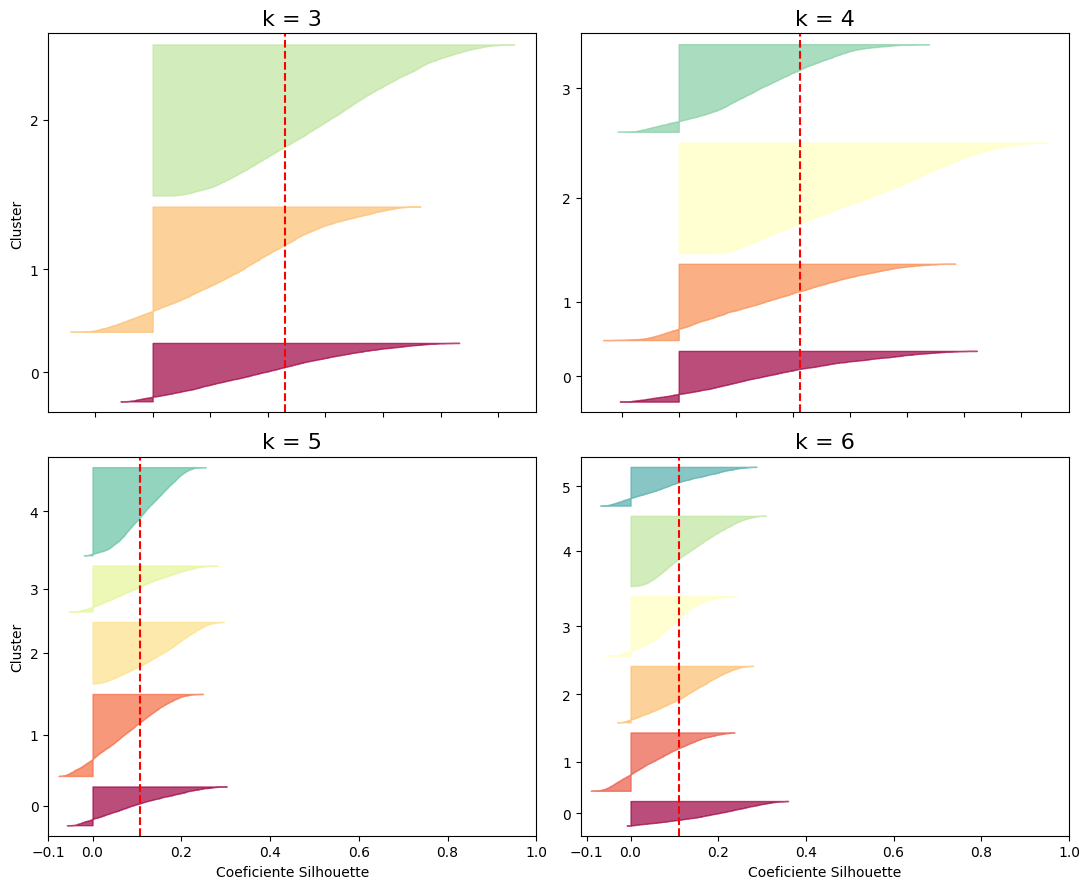

In [33]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

# Preparamos los datos
X = np.array(X_matriz_imagenes)  # Asegurarnos que es un array numpy
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 10)] # Creamos modelos KMeans para k entre 2 y 9
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]  # Calculamos los silhouette scores promedio para cada modelo

# Creamos la gráfica
plt.figure(figsize=(11, 9))

for idx, k in enumerate([3, 4, 5, 6]):   # Para k = 3 a 6
    plt.subplot(2, 2, idx + 1)           # Elegimos el subplot en la cuadrícula 2x2

    y_pred = kmeans_per_k[k-2].labels_  # k-2 porque kmeans_per_k empieza en k=2
    silhouette_coefficients = silhouette_samples(X, y_pred)  # Calculamos el silhouette de cada muestra

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if idx in [0, 2]:  # Subplots izquierdos
        plt.ylabel("Cluster")

    if idx in [2, 3]:  # Subplots inferiores
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente Silhouette")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--")
    plt.title(f"k = {k}", fontsize=16)
    plt.ylim(0, pos)  # Ajustamos el límite vertical

plt.tight_layout()
plt.show()